#### Import dependencies

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#### Let's take a look what it takes for two odds to present an arbitrage opportunity:
The odds must satisfy the following equation:   1/odd1 + 1/odd2 < 1, where odd1 and odd2 are decimal odds [1, ∞)

In [2]:
def surebet(odd1, odd2):
    odd1 = round(float(odd1), 2)
    odd2 = round(float(odd2), 2)
    if 1/odd1 + 1/odd2 < 1:
        return True
    else:
        return False

#### We can visualize this inequality with the following graph:

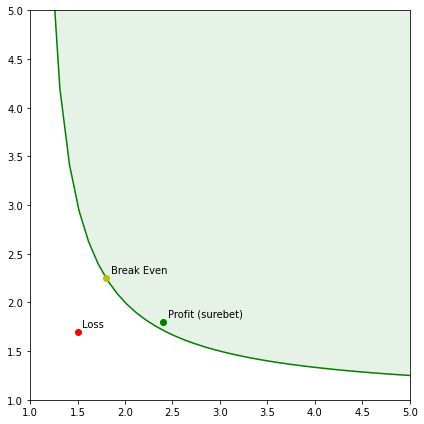

In [197]:
x = np.linspace(0, 10, 100)
y = -x/(1-x)

plt.figure(figsize=(6, 6))
plt.plot(x, y, 'g')

plt.xlim([1, 5])
plt.ylim([1, 5])

plt.fill_between(x, y, 100, color='green', alpha=0.1)

plt.plot(1.8, 2.25, 'yo')
plt.plot(1.5, 1.7, 'ro')
plt.plot(2.4, 1.8, 'bo')

plt.annotate('Break Even', (1.85, 2.30))
plt.annotate('Profit (surebet)', (2.45, 1.85))
plt.annotate('Loss', (1.55, 1.75))

plt.show()

#### Now that we know what qualifies as a surebet, let's start pulling some data
I'll be using an API called API-Baseball that provides live MLB odds for a variety of events
We'll need to import requests to communicate with this API

In [204]:
import requests
import json

Now we can send a request for all odds in a particular game
For this example, let's choose the Yankees vs. Red Sox game on July 10, 2022, which has a game ID of 73550

In [209]:
game_id = 73550
url = f'https://v1.baseball.api-sports.io/odds?game={game_id}' # API URL 

payload = {}
headers = {
    'x-rapidapi-key': '0e67e49360a2c88c8f6f4955877c3808', # my API key
    'xx-rapidapi-host': 'v1.baseball.api-sports.io', # API host URL
}

response = requests.request("GET", url, headers=headers, data=payload) # send a request to the API
data = response.json()['response'][0] # load the data in a new var

data['bookmakers'][0] # print out all bets offered by the first bookmaker, NordicBet

{'id': 23,
 'name': 'NordicBet',
 'bets': [{'id': 14,
   'name': 'Match Winner',
   'values': [{'value': 'Home', 'odd': '2.15'},
    {'value': 'Draw', 'odd': '8.50'},
    {'value': 'Away', 'odd': '1.95'}]},
  {'id': 1,
   'name': 'Home/Away',
   'values': [{'value': 'Home', 'odd': '2.00'},
    {'value': 'Away', 'odd': '1.83'}]},
  {'id': 2,
   'name': 'Asian Handicap',
   'values': [{'value': 'Home -1.5', 'odd': '3.10'},
    {'value': 'Away -1.5', 'odd': '1.38'},
    {'value': 'Home +1.5', 'odd': '1.62'},
    {'value': 'Away +1.5', 'odd': '2.35'},
    {'value': 'Home +2.5', 'odd': '1.41'},
    {'value': 'Away +2.5', 'odd': '2.95'},
    {'value': 'Home +3.5', 'odd': '1.27'},
    {'value': 'Away +3.5', 'odd': '3.80'}]},
  {'id': 5,
   'name': 'Over/Under',
   'values': [{'value': 'Over 9.5', 'odd': '2.55'},
    {'value': 'Under 9.5', 'odd': '1.54'},
    {'value': 'Over 7.5', 'odd': '1.71'},
    {'value': 'Under 7.5', 'odd': '2.20'},
    {'value': 'Over 8.5', 'odd': '2.05'},
    {'value':